# 4. Nichtlineare Gleichungen

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

## 4.1 Bisektionsverfahren

In [3]:
def bisection(f, a, b, tol, termination_criterion='x', print_info=False):

    #check if a or b is an exact zero
    if f(a) == 0:
        return a
    elif f(b) == 0:
        return b

    if f(a)*f(b) > 0:
        raise Exception('f(a) and f(b) must have opposite signs')

    def check_termination_criterion(x, a, b, tol):
        if termination_criterion == 'x':
            return abs(b - a) < tol
        elif termination_criterion == 'y':
            return abs(f(x)) < tol
        else:
            raise Exception('Unknown termination criterion: {}'.format(termination_criterion))

    x = .5*(a + b)
    k = 0
    terminate = check_termination_criterion(x, a, b, tol)
    while not terminate:
        if f(x) == 0: #found exact zero
            break
        elif f(a)*f(x) > 0:
            a = x
        else:
            b = x
        x = .5*(a + b)
        k += 1
        if print_info:
            print('k = {:2d}, a = {:15.8e}, b = {:15.8e}, x = {:15.8e}, f(x) = {:15.8e}'.format(k, a, b, x, f(x)))
        terminate = check_termination_criterion(x, a, b, tol)

    if print_info:
        print('terminated after {} iterations'.format(k))
        print('x = {}, f(x) = {}'.format(x, f(x)))
    return x

### Testproblem
Finde Nullstelle von $f(x) := e^{-x} - \sin x$

$f(0) = 1 > 0$, $f(\pi/2) = e^{-\pi/2} - 1 < 0$

In [4]:
def f(x):
    return np.exp(-x) - np.sin(x)

In [5]:
a = 0
b = .5*math.pi
tol = 1e-6
x_bisection = bisection(f, a, b, tol, print_info=True)

k =  1, a =  0.00000000e+00, b =  7.85398163e-01, x =  3.92699082e-01, f(x) =  2.92548474e-01
k =  2, a =  3.92699082e-01, b =  7.85398163e-01, x =  5.89048623e-01, f(x) = -7.15322860e-04
k =  3, a =  3.92699082e-01, b =  5.89048623e-01, x =  4.90873852e-01, f(x) =  1.40694546e-01
k =  4, a =  4.90873852e-01, b =  5.89048623e-01, x =  5.39961237e-01, f(x) =  6.86680975e-02
k =  5, a =  5.39961237e-01, b =  5.89048623e-01, x =  5.64504930e-01, f(x) =  3.36439746e-02
k =  6, a =  5.64504930e-01, b =  5.89048623e-01, x =  5.76776776e-01, f(x) =  1.63809674e-02
k =  7, a =  5.76776776e-01, b =  5.89048623e-01, x =  5.82912699e-01, f(x) =  7.81195073e-03
k =  8, a =  5.82912699e-01, b =  5.89048623e-01, x =  5.85980661e-01, f(x) =  3.54309205e-03
k =  9, a =  5.85980661e-01, b =  5.89048623e-01, x =  5.87514642e-01, f(x) =  1.41257863e-03
k = 10, a =  5.87514642e-01, b =  5.89048623e-01, x =  5.88281632e-01, f(x) =  3.48301328e-04
k = 11, a =  5.88281632e-01, b =  5.89048623e-01, x =  5.886

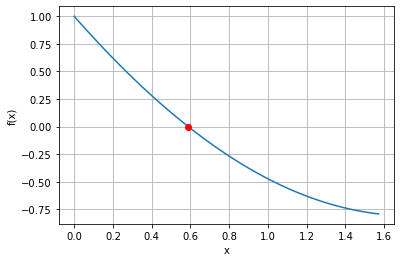

In [6]:
x = np.linspace(0, .5*math.pi, 100)
plt.plot(x, f(x))
plt.plot(x_bisection, f(x_bisection), 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

## 4.2 Newton-Verfahren

In [7]:
def newton(f, df, x0, tol, maxits=100, termination_criterion='x', print_info=False):

    if df(x0) == 0:
        raise Exception('df(x0) = 0 is not allowed')

    def check_termination_criterion(x, dx, tol):
        if termination_criterion == 'x':
            return abs(dx) < tol
        elif termination_criterion == 'y':
            return abs(f(x)) < tol
        else:
            raise Exception('Unknown termination criterion: {}'.format(termination_criterion))

    x = x0
    k = 0
    terminate=False
    while k < maxits and not terminate:
        dx = f(x)/df(x)
        x -= dx
        k += 1
        if print_info:
            print('k = {:2d}, x = {:15.8e}, f(x) = {:15.8e}, dx = {:15.8e}'.format(k, x, f(x), dx))
        terminate = check_termination_criterion(x, dx, tol)

    if print_info:
        print('terminated after {} iterations'.format(k))
        print('x = {}, f(x) = {}'.format(x, f(x)))
    return x

### Gleiches Testproblem wie oben
$f(x) = e^{-x} - \sin x$

$f'(x) = -e^{-x} - \cos x$

In [8]:
def df(x):
    return -np.exp(-x) - np.cos(x)

In [9]:
x0 = 1.
tol = 1e-6
x_newton = newton(f, df, x0, tol, print_info=True)

k =  1, x =  4.78527789e-01, f(x) =  1.59222211e-01, dx =  5.21472211e-01
k =  2, x =  5.84157019e-01, f(x) =  6.07930613e-03, dx = -1.05629230e-01
k =  3, x =  5.88525112e-01, f(x) =  1.05845200e-05, dx = -4.36809280e-03
k =  4, x =  5.88532744e-01, f(x) =  3.23333582e-11, dx = -7.63175116e-06
k =  5, x =  5.88532744e-01, f(x) =  0.00000000e+00, dx = -2.33134476e-11
terminated after 5 iterations
x = 0.5885327439818611, f(x) = 0.0


### Anwendung: Heron-Verfahren zur Berechnung der Quadratwurzel

In [10]:
def heron(a, tol, x0=None, termination_criterion='x', print_info=False):
    def f(x):
        return x**2 - a 
    def df(x):
        return 2*x
    if x0==None:
        x0 = a
    return newton(f, df, x0, tol, termination_criterion=termination_criterion, print_info=print_info)

In [11]:
x = heron(4, 1e-6, print_info=True)

k =  1, x =  2.50000000e+00, f(x) =  2.25000000e+00, dx =  1.50000000e+00
k =  2, x =  2.05000000e+00, f(x) =  2.02500000e-01, dx =  4.50000000e-01
k =  3, x =  2.00060976e+00, f(x) =  2.43939619e-03, dx =  4.93902439e-02
k =  4, x =  2.00000009e+00, f(x) =  3.71689188e-07, dx =  6.09663175e-04
k =  5, x =  2.00000000e+00, f(x) =  8.88178420e-15, dx =  9.29222927e-08
terminated after 5 iterations
x = 2.000000000000002, f(x) = 8.881784197001252e-15


In [12]:
x = heron(2, 1e-6, print_info=True)

k =  1, x =  1.50000000e+00, f(x) =  2.50000000e-01, dx =  5.00000000e-01
k =  2, x =  1.41666667e+00, f(x) =  6.94444444e-03, dx =  8.33333333e-02
k =  3, x =  1.41421569e+00, f(x) =  6.00730488e-06, dx =  2.45098039e-03
k =  4, x =  1.41421356e+00, f(x) =  4.51061410e-12, dx =  2.12389982e-06
k =  5, x =  1.41421356e+00, f(x) =  4.44089210e-16, dx =  1.59474291e-12
terminated after 5 iterations
x = 1.4142135623730951, f(x) = 4.440892098500626e-16
